In [1]:
%autosave 0
import pandas as pd
import glob
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date, timedelta
import shutil

from sklearn.metrics import mean_absolute_error, mean_squared_error

Autosave disabled


In [2]:
path = r'C:\Users\utilisateur\0-DataScience\Formation-P3\Covid-19\AzureSC\Rapport'
all_files = glob.glob(path + "/*.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=0, header=0)
    li.append(df)
    os.unlink(filename)

frame = pd.concat(li, axis=0, ignore_index=True)
frame

,date,country,total_cases_predict,total_cases_real,total_deaths_predict,total_deaths_real,error_abs_cases,error_abs_deaths
0,2020-03-29,France,37972.0,37575.0,2517.0,2314.0,397.0,203.0
1,2020-03-29,China,82472.0,82342.0,3304.0,3306.0,130.0,-2.0
2,2020-03-29,Italy,93505.0,92472.0,10092.0,10023.0,1033.0,69.0
3,2020-03-29,Spain,74605.0,72248.0,5565.0,5690.0,2357.0,-125.0
4,2020-03-29,United States,128133.0,124665.0,2201.0,2191.0,3468.0,10.0
...,...,...,...,...,...,...,...,...
1534,2020-09-05,United Kingdom,341886.0,342351.0,41570.0,41537.0,-465.0,33.0
1535,2020-09-05,Germany,248132.0,248997.0,9330.0,9324.0,-865.0,6.0
1536,2020-09-05,Iran,384749.0,382772.0,22165.0,22044.0,1977.0,121.0
1537,2020-09-05,Turkey,276239.0,276555.0,6547.0,6564.0,-316.0,-17.0


In [3]:
def showMetricsGeneral(subject):
    print(f"-- Global performances for {subject} --")
    MAPE =mean_absolute_error(frame[f'total_{subject}_real'],frame[f'total_{subject}_predict']) 
    print("MAPE = ",MAPE)
    RMSE = mean_squared_error(frame[f'total_{subject}_real'],frame[f'total_{subject}_predict'], squared=False)
    print("RMSE = ",RMSE)

In [4]:
showMetricsGeneral("cases")

-- Global performances for cases --
MAPE =  8507.415854450943
RMSE =  32960.11970666934


In [5]:
showMetricsGeneral("deaths")

-- Global performances for deaths --
MAPE =  301.635477582846
RMSE =  743.9246064037642


In [6]:
def visFollow(country,subject):
    df = frame[frame['country'].isin([f"{country}"])]
    list_value_predict = df[f"total_{subject}_predict"]
    list_value_real = df[f"total_{subject}_real"]
    
    print(f"-- {country} performances for {subject} --")
    MAPE =mean_absolute_error(list_value_real,list_value_predict) 
    print("MAE = ",MAPE)
    RMSE = mean_squared_error(list_value_real,list_value_predict, squared=False)
    print("RMSE = ",RMSE)
    
    this_graf = plt.plot(df["date"], list_value_predict, 'go--', 
                         linewidth=2, markersize=12,label=f'{subject} predict')
    this_graf = plt.plot(df["date"], list_value_real, color='red',
                         marker='o',linewidth=2, markersize=12,label=f'{subject} real')
    this_graf =plt.title(f"{country}")
    plt.legend()
    plt.xticks(rotation=70)
    return this_graf

def visMetrics(country):
    vv = frame[frame['country'].isin([f"{country}"])]
    plt.plot(vv["error_abs_cases"],marker='o',label="error_abs_cases",color='blue',markersize=12)
    plt.plot(vv["error_abs_deaths"],marker='o',label="error_abs_deaths",color='orange',markersize=12)
    plt.title("Abs error over time")
    plt.legend()

def visShow(country):
    f0 = plt.figure(figsize=(20,10))
#     ax1 = plt.subplot(1,2,1)
    v = visFollow(f"{country}","cases")
    f1 = plt.figure(figsize=(20,10))
#     ax2 = f1.add_subplot(1,2,2)
    v = visFollow(f"{country}","deaths")
    f2 = plt.figure(figsize=(20,10))
#     ax3 = f2.add_subplot(1,2,1)
    v = visMetrics(country)

-- World performances for cases --
MAE =  60531.40410958904
RMSE =  103754.3510638377
-- World performances for deaths --
MAE =  1709.6849315068494
RMSE =  2085.782570525233


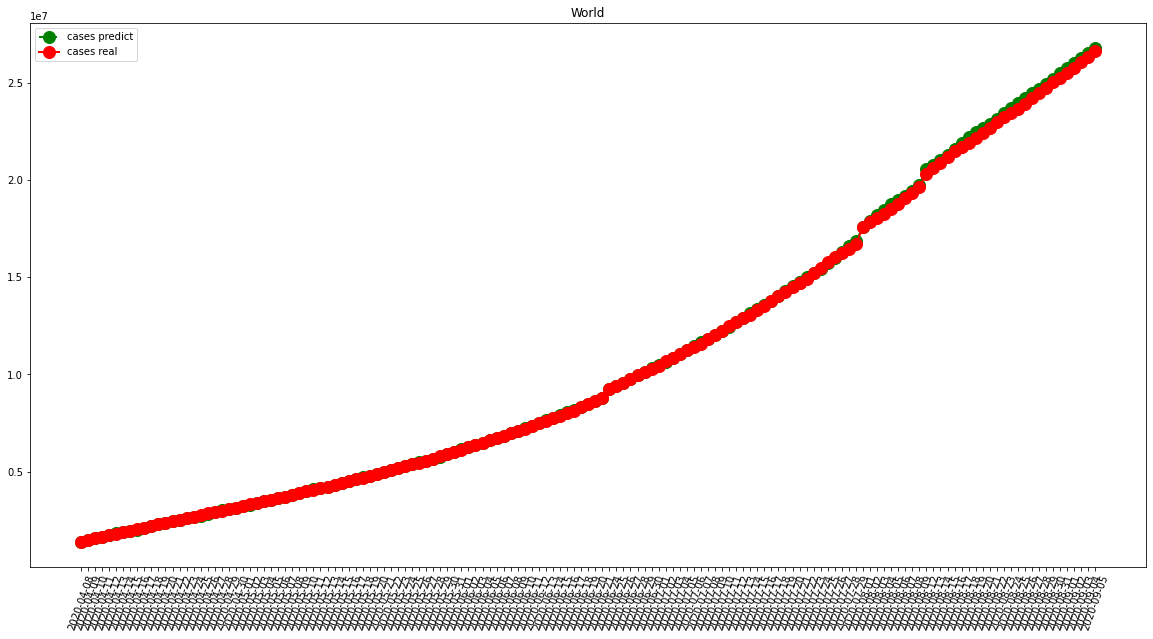

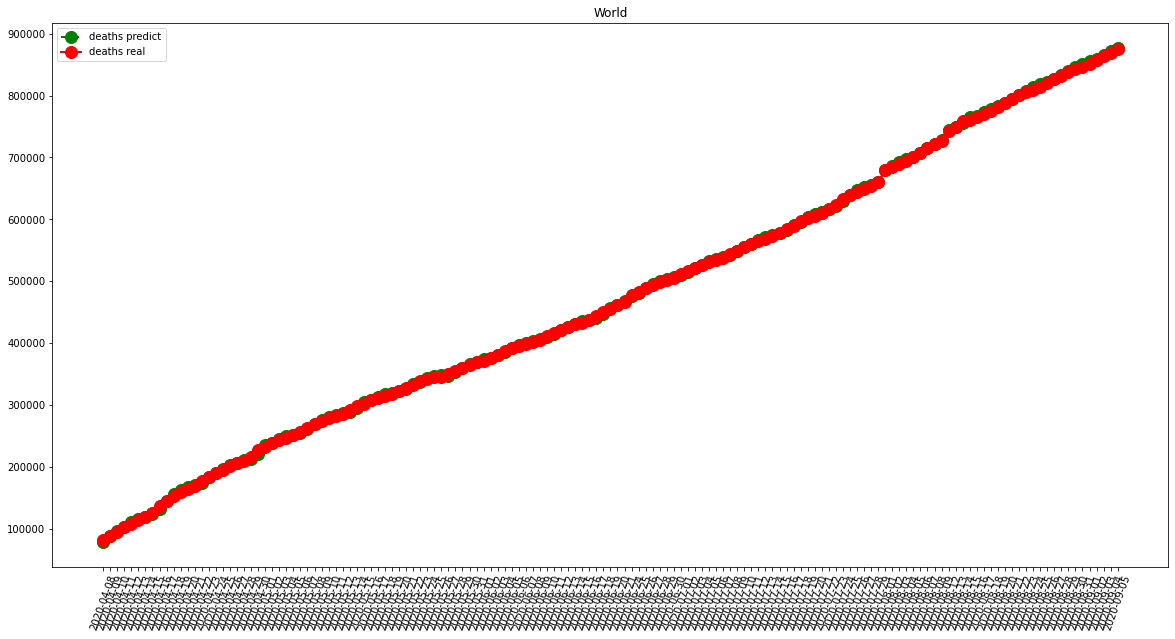

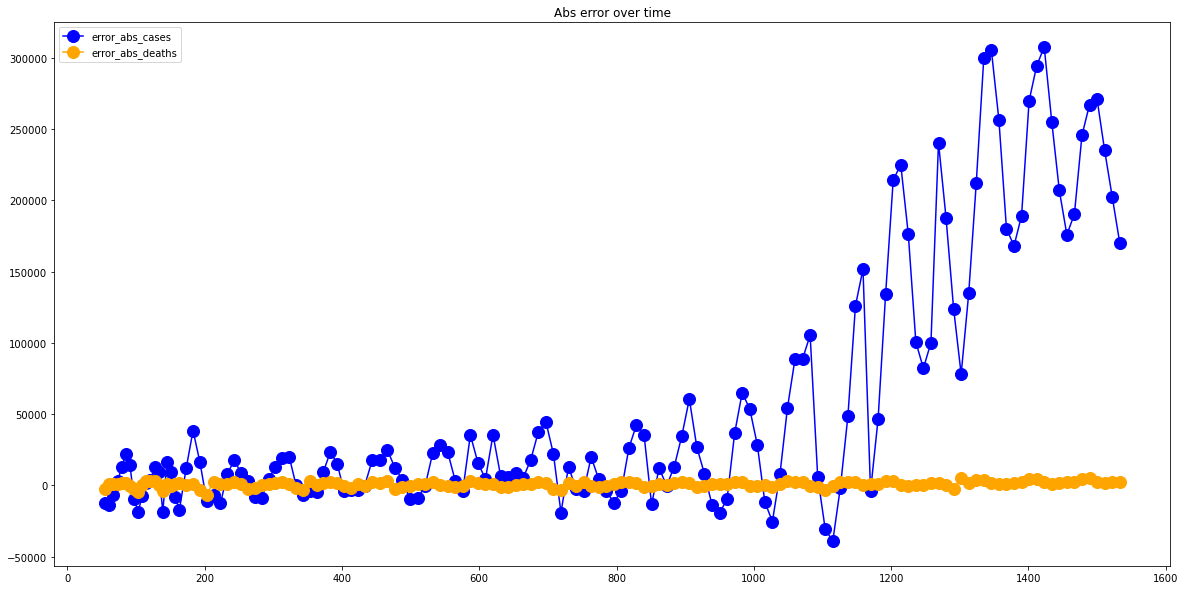

In [7]:
visShow("World")

-- France performances for cases --
MAE =  1014.0448717948718
RMSE =  1520.8457856883958
-- France performances for deaths --
MAE =  120.28205128205128
RMSE =  268.5975685782614


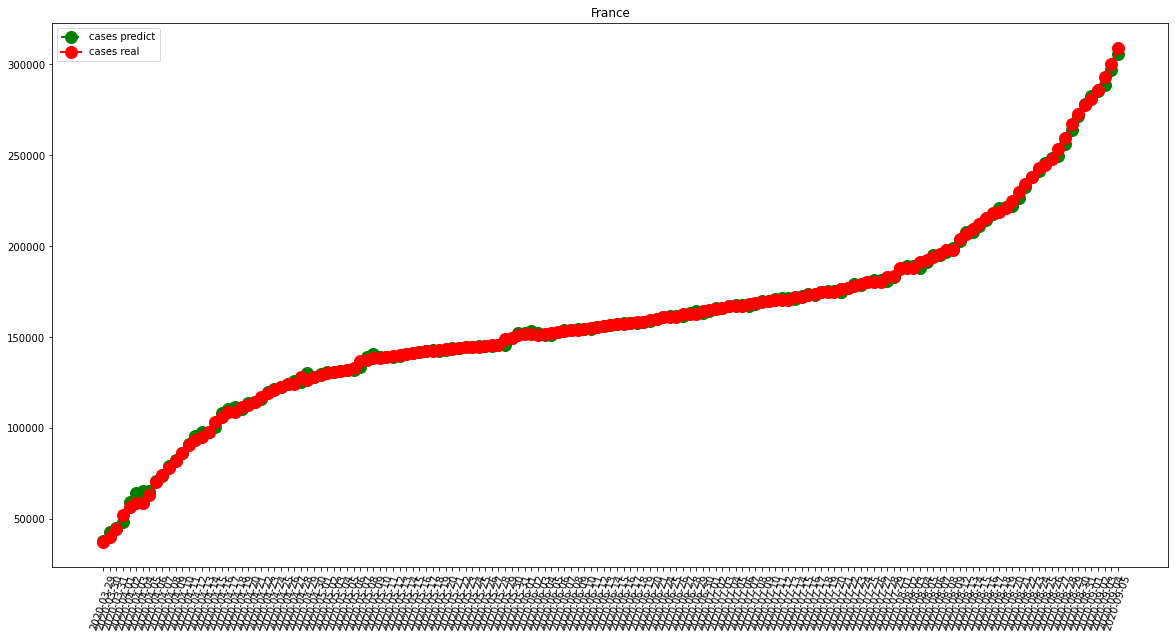

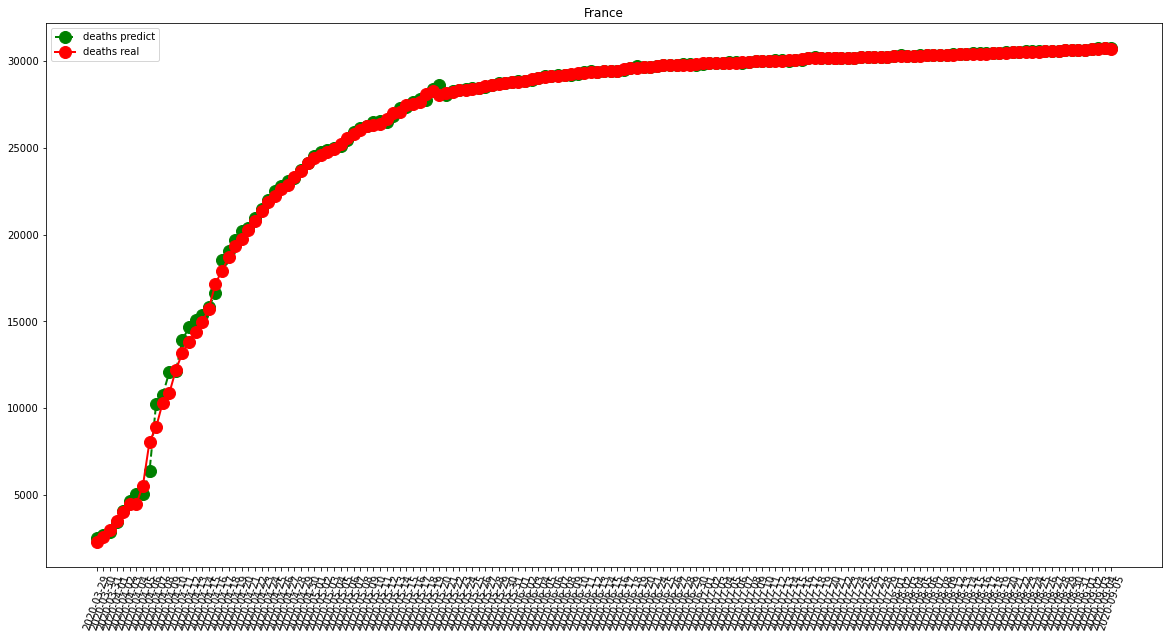

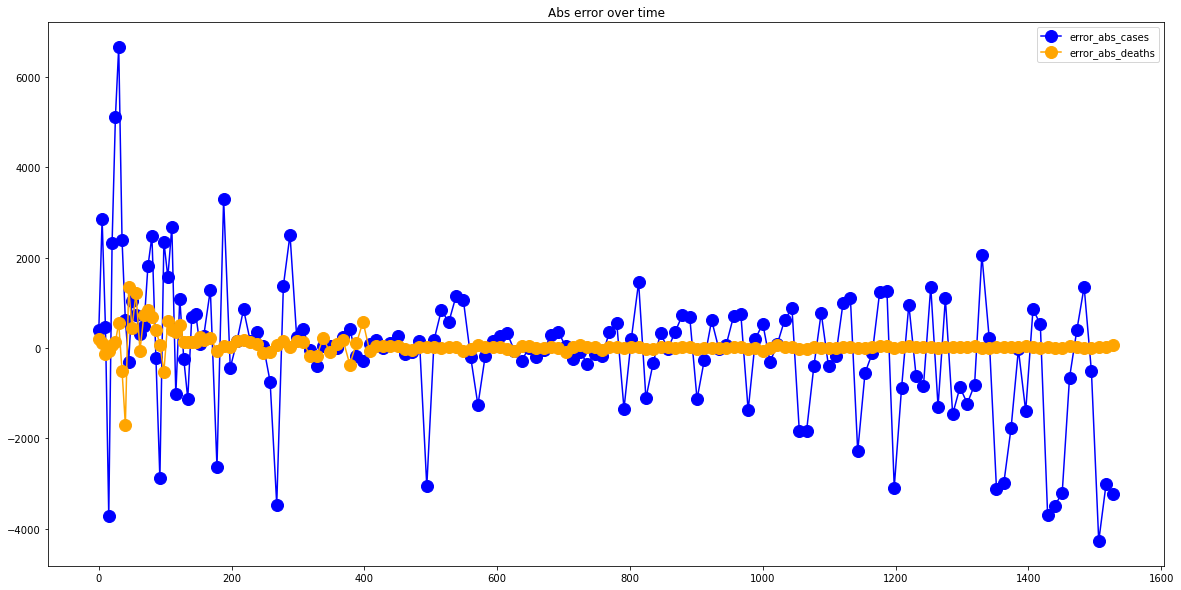

In [8]:
visShow("France")

-- Italy performances for cases --
MAE =  305.19871794871796
RMSE =  455.0964606119657
-- Italy performances for deaths --
MAE =  71.8076923076923
RMSE =  237.68301989986148


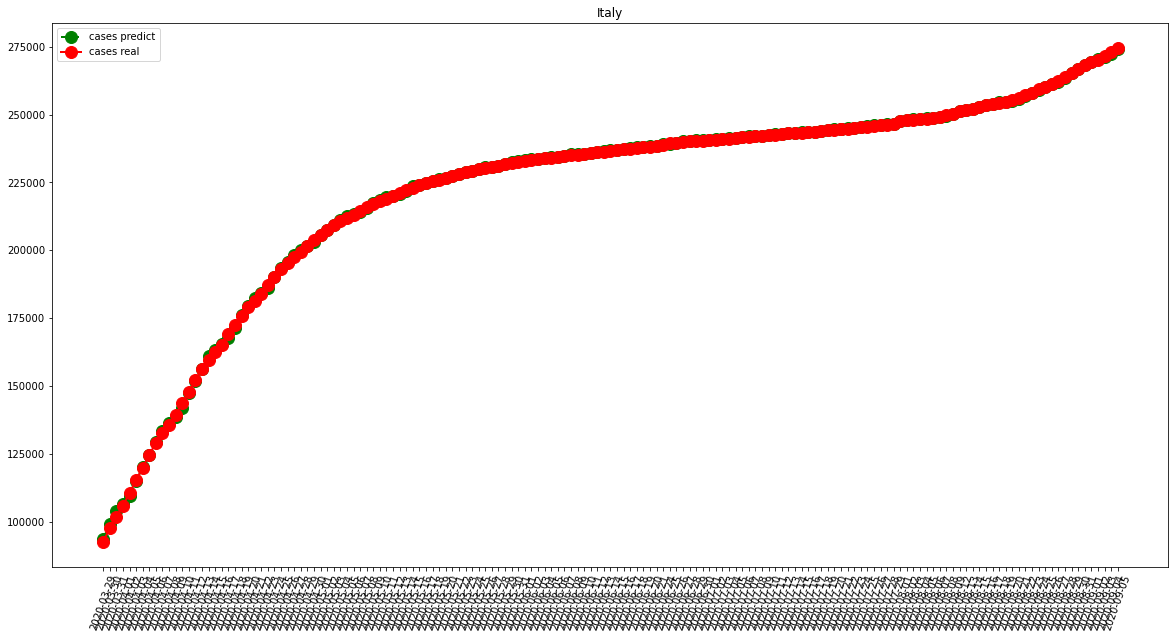

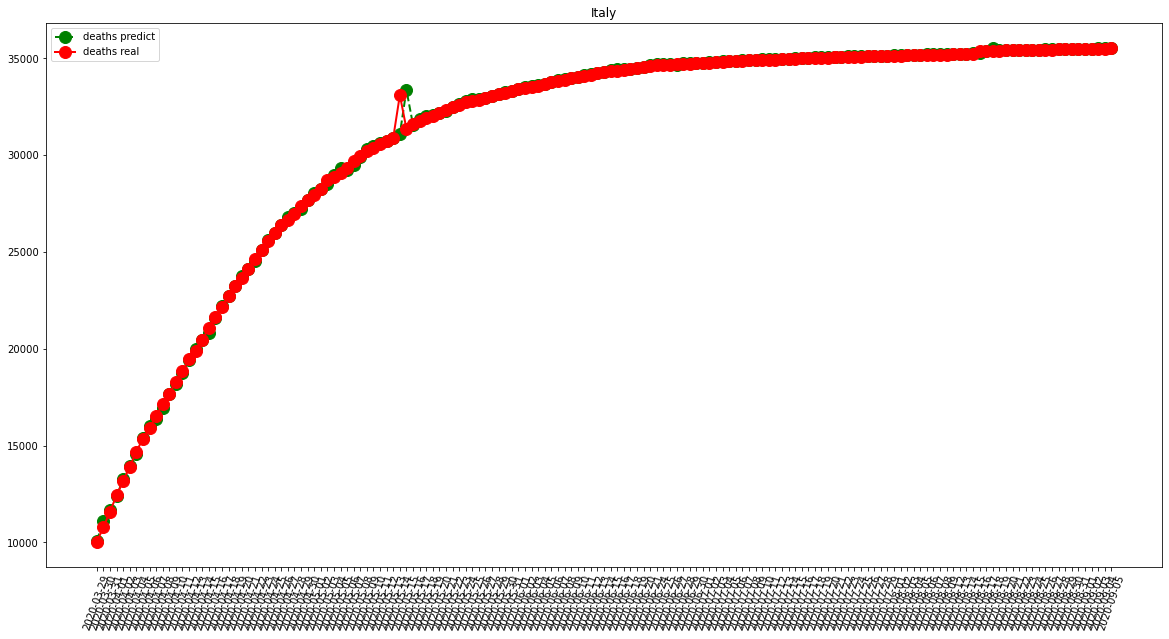

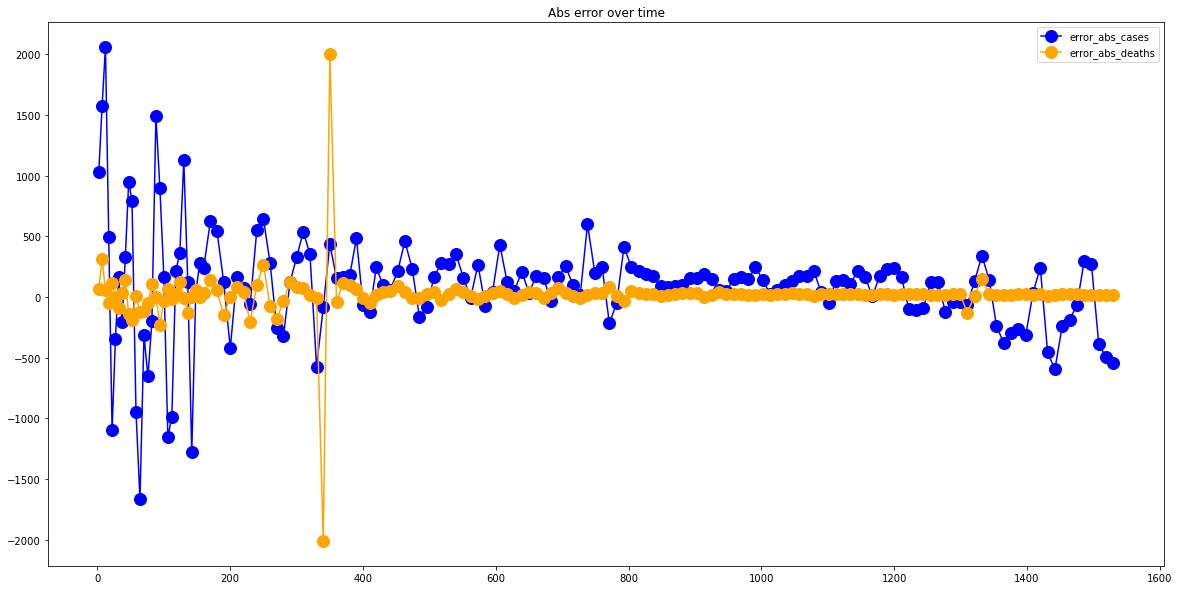

In [9]:
visShow("Italy")

-- Spain performances for cases --
MAE =  1992.7628205128206
RMSE =  3867.5305602690955
-- Spain performances for deaths --
MAE =  124.58974358974359
RMSE =  325.5829288979132


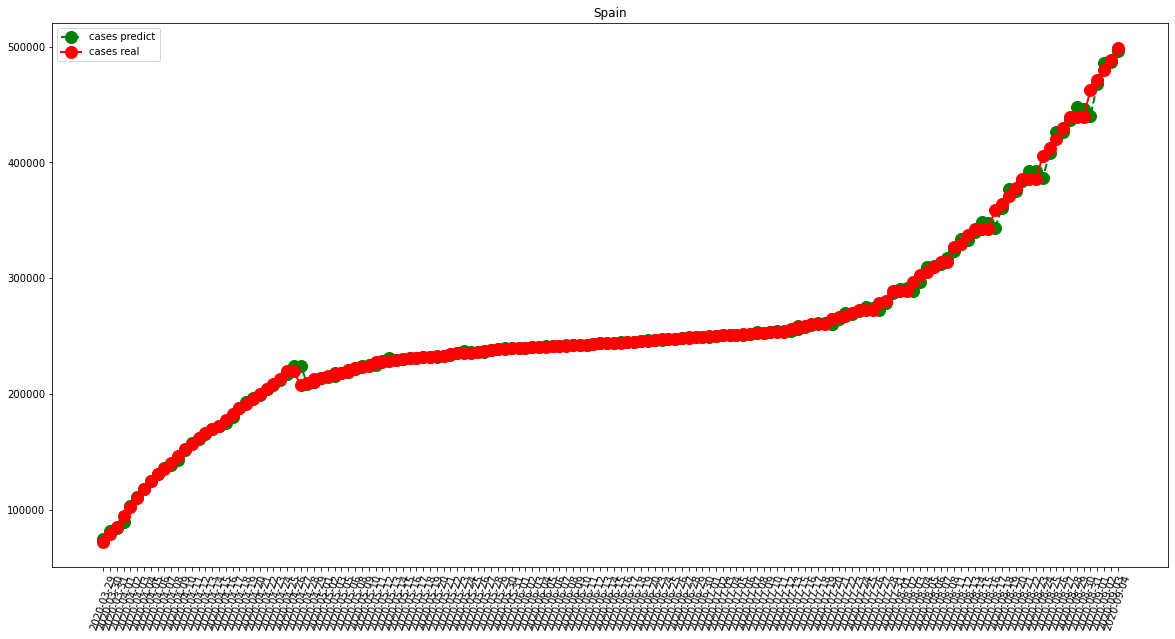

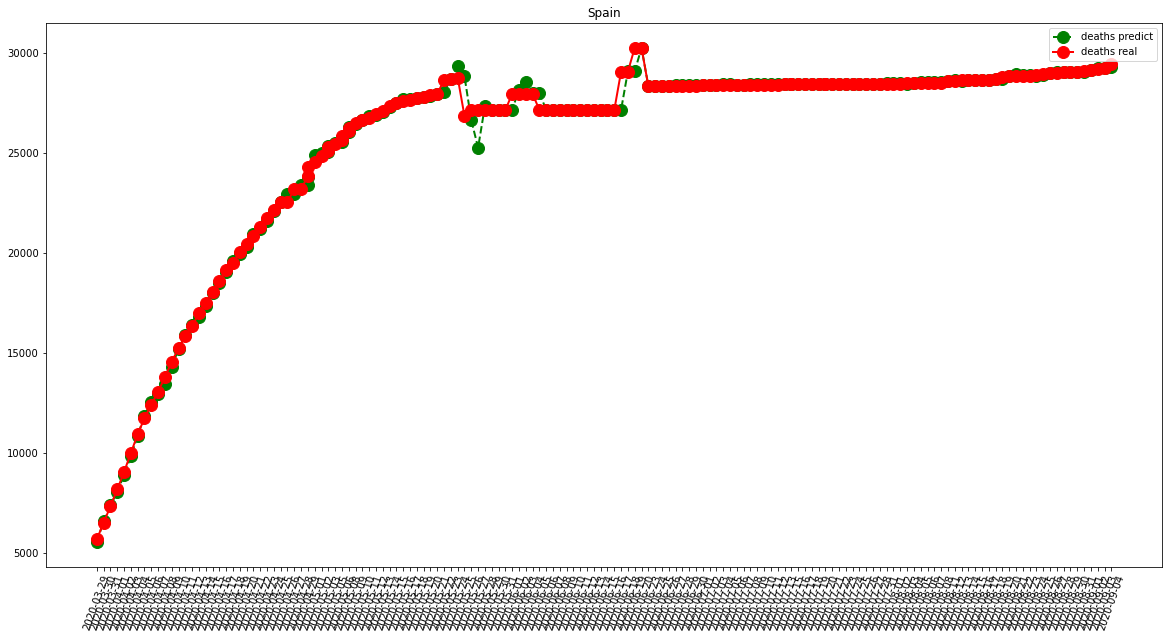

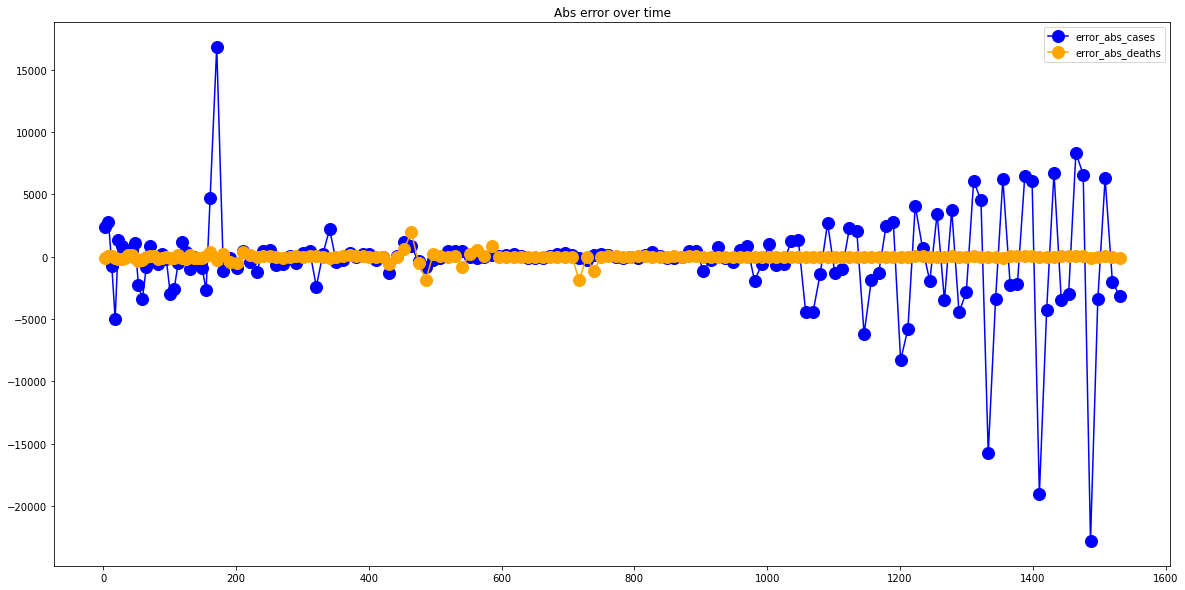

In [10]:
visShow("Spain")

-- United States performances for cases --
MAE =  12838.76923076923
RMSE =  19832.47933186161
-- United States performances for deaths --
MAE =  483.65384615384613
RMSE =  685.0788182242151


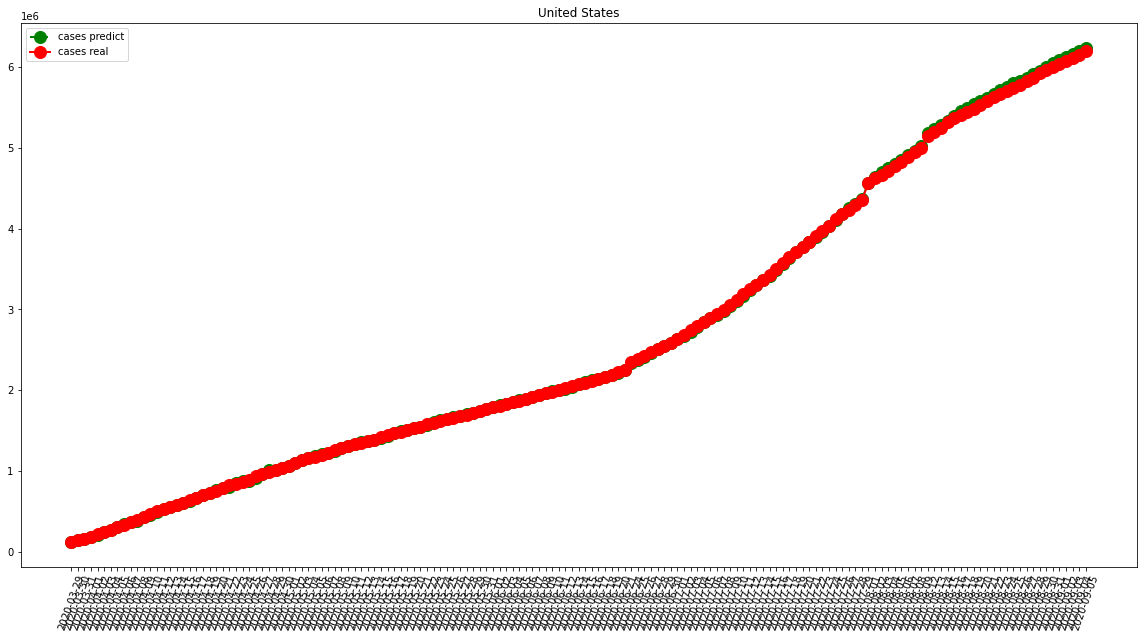

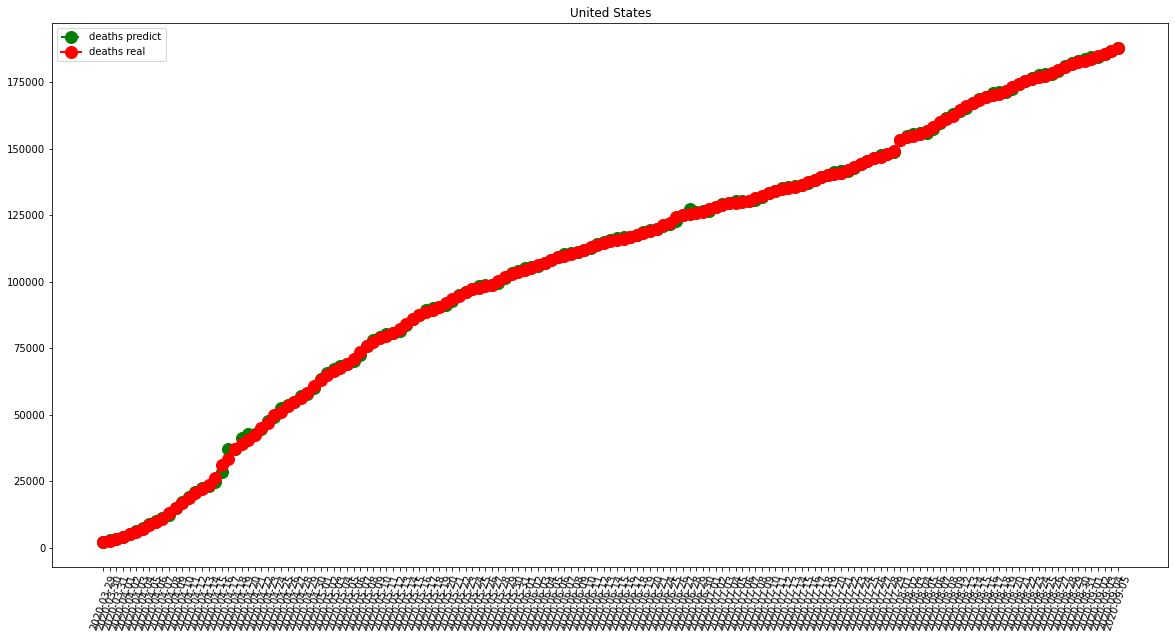

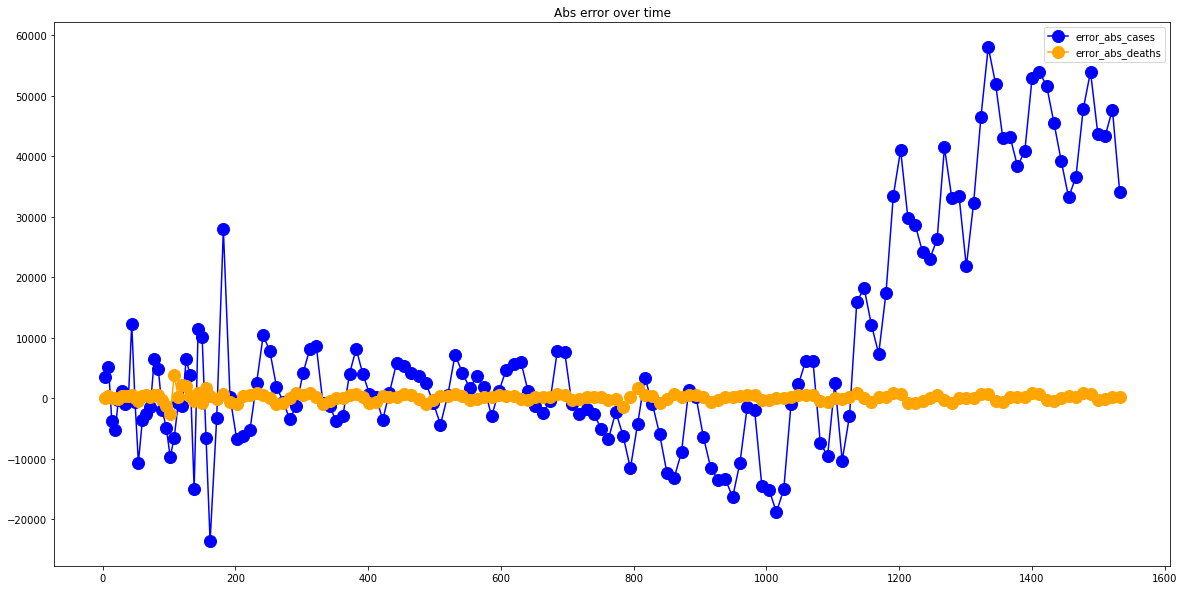

In [11]:
visShow("United States")

-- China performances for cases --
MAE =  64.28846153846153
RMSE =  95.53731315631713
-- China performances for deaths --
MAE =  26.858974358974358
RMSE =  125.72303707468274


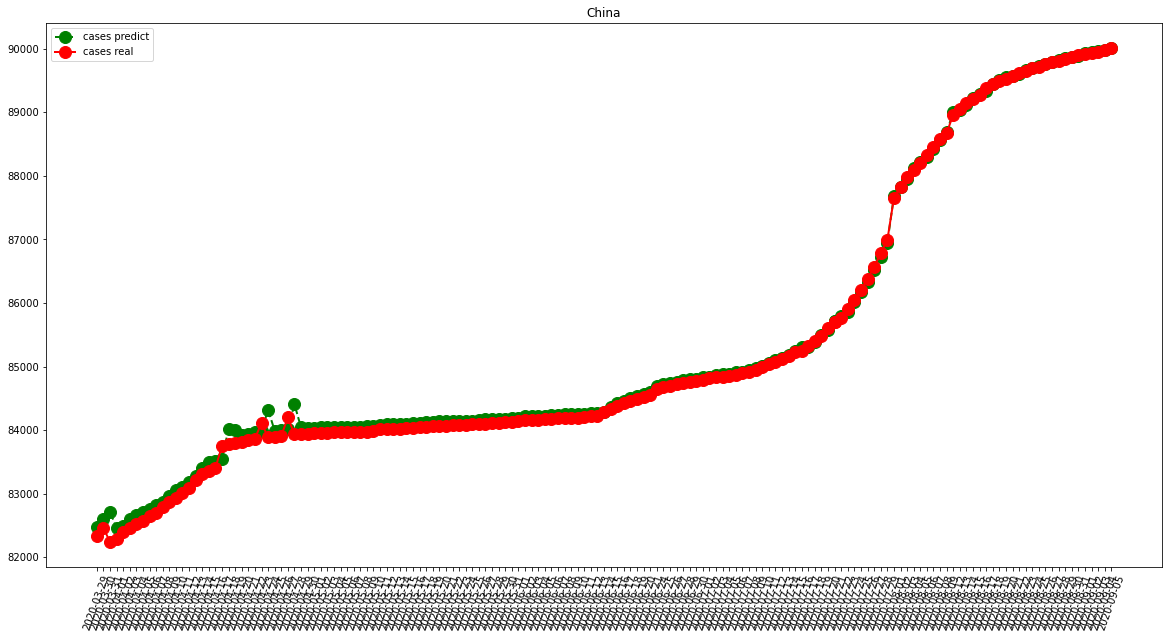

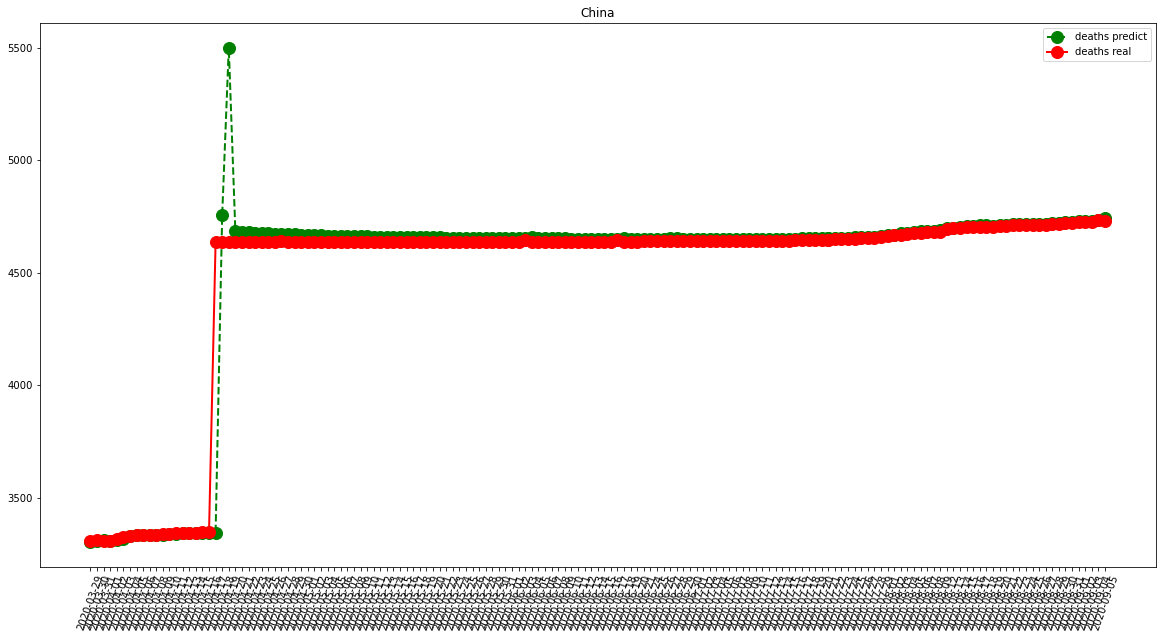

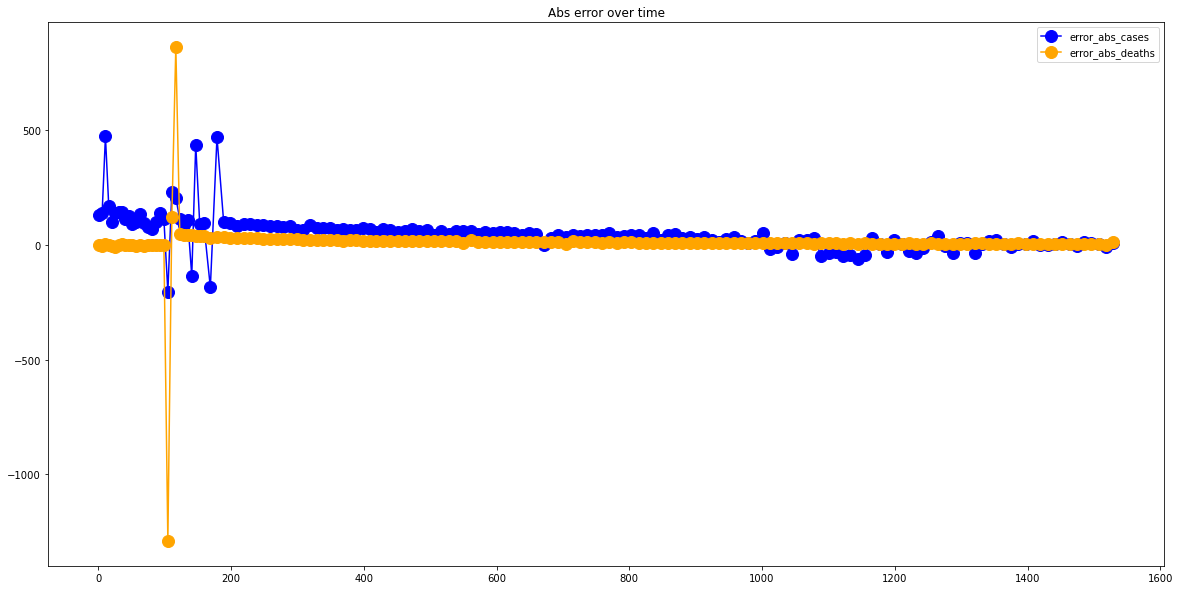

In [12]:
visShow("China")

-- United Kingdom performances for cases --
MAE =  1036.765625
RMSE =  3696.367310870904
-- United Kingdom performances for deaths --
MAE =  237.1875
RMSE =  754.3355830630026


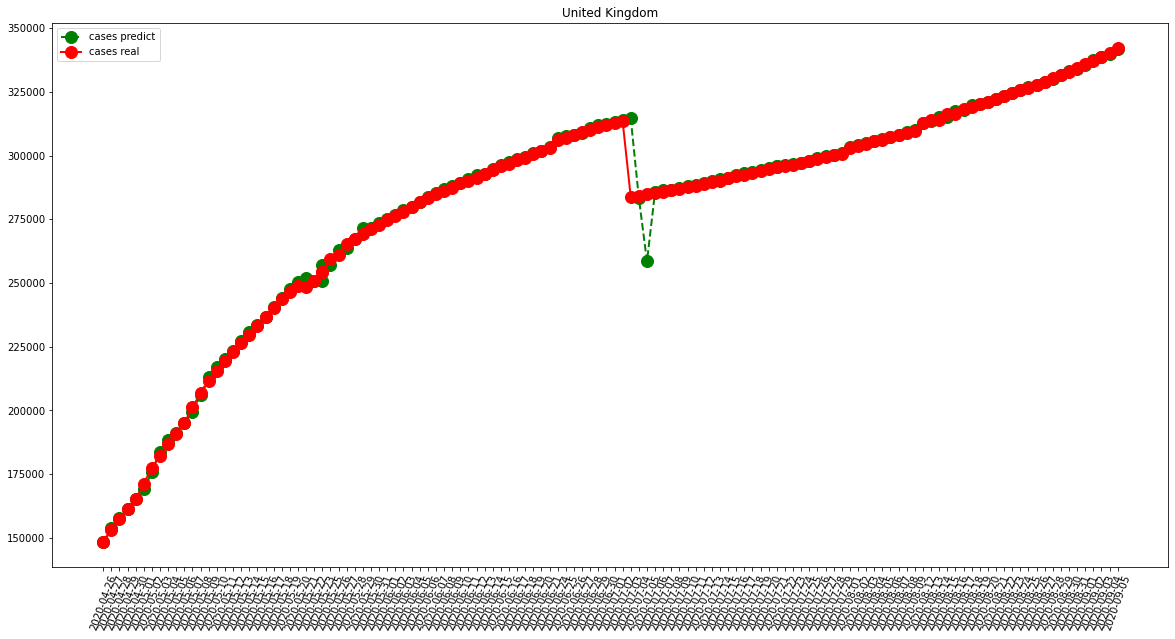

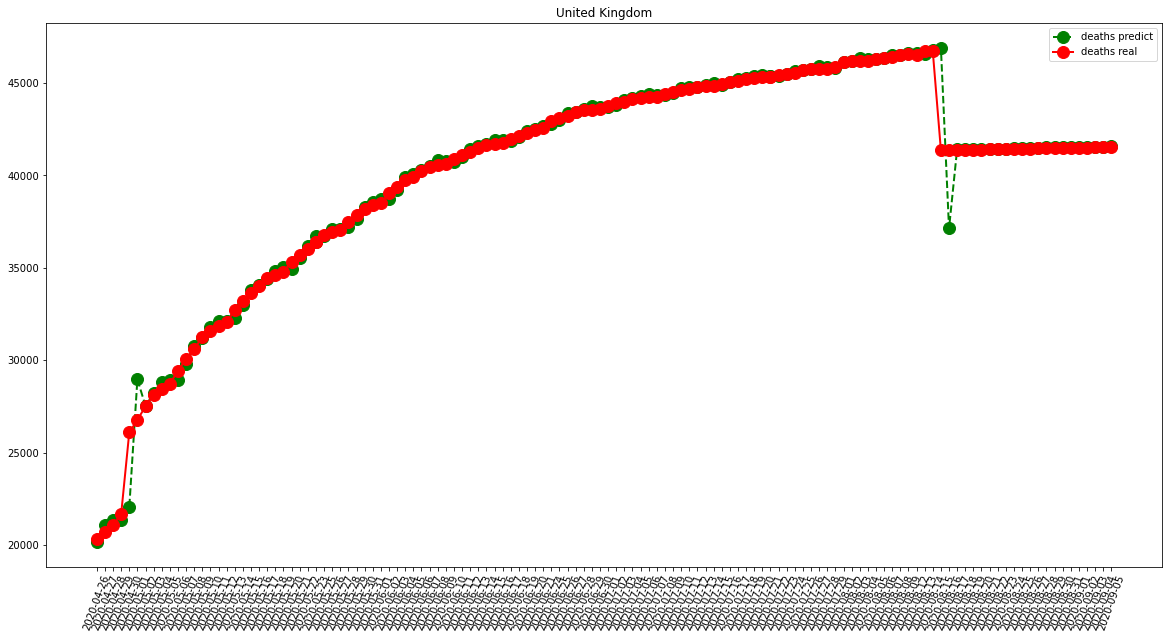

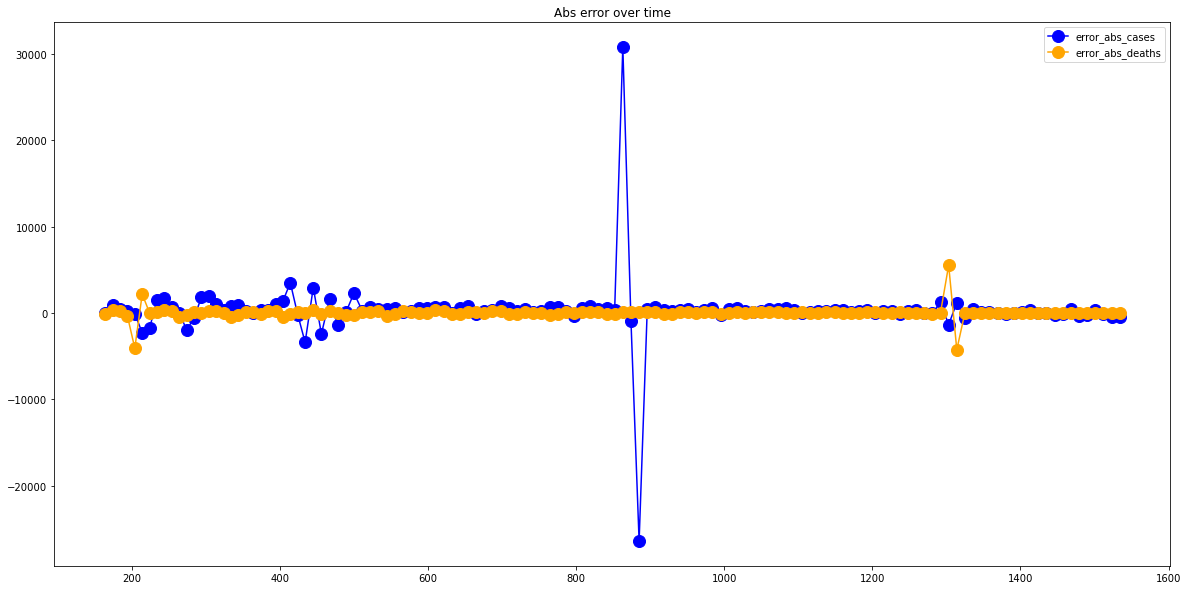

In [13]:
visShow("United Kingdom")

-- Germany performances for cases --
MAE =  402.5
RMSE =  583.4200218324702
-- Germany performances for deaths --
MAE =  20.5859375
RMSE =  38.87711007135175


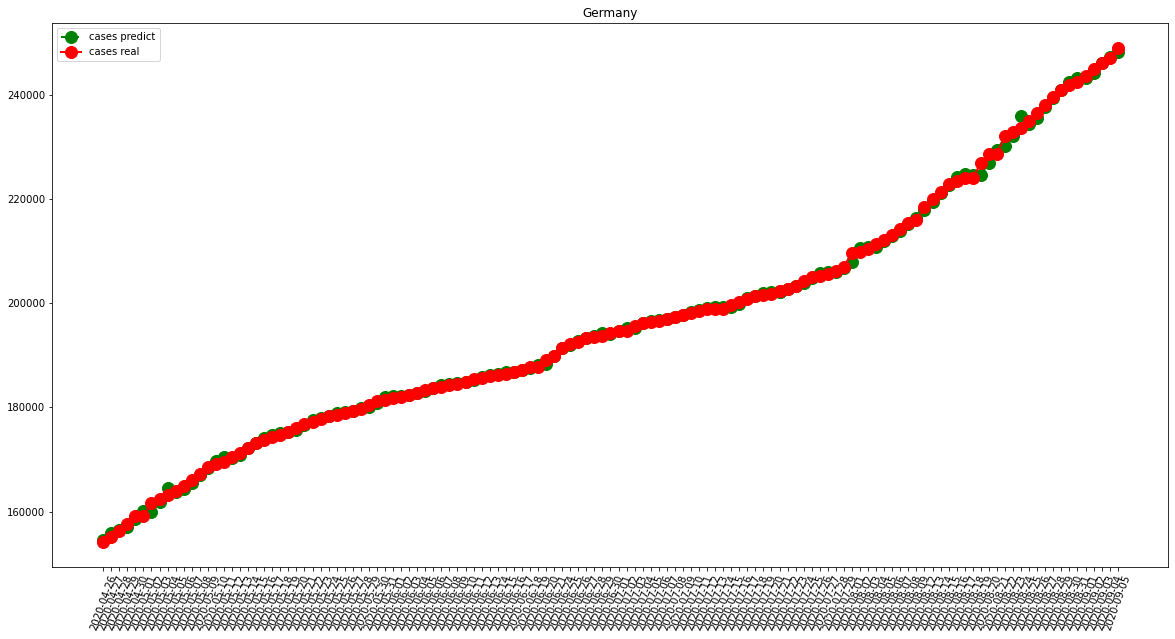

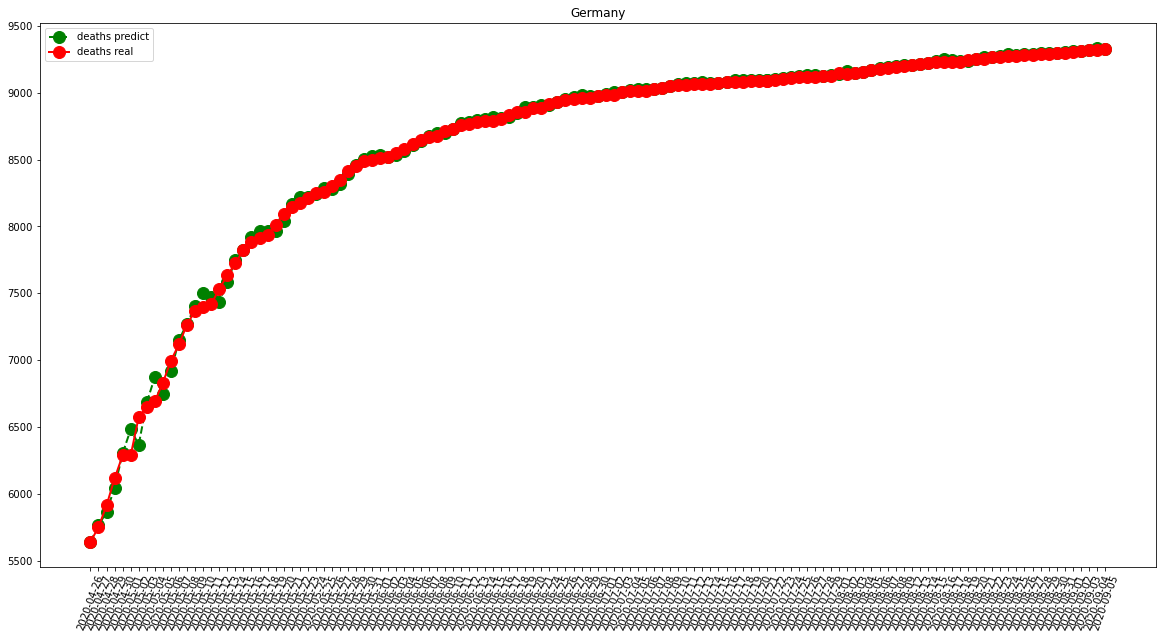

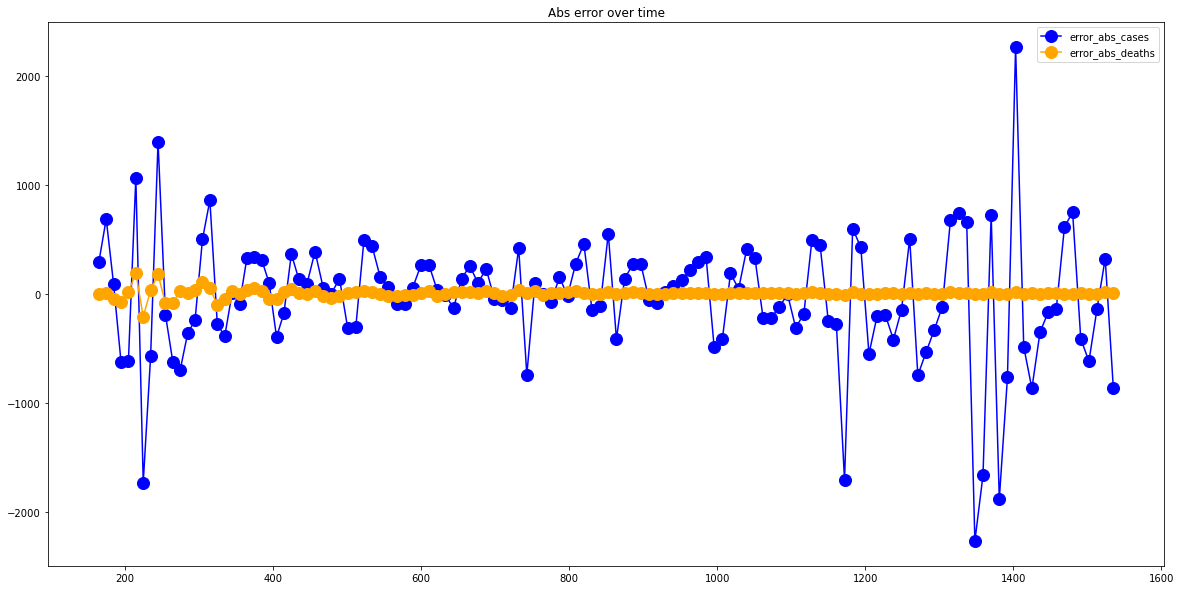

In [14]:
visShow("Germany")

-- Iran performances for cases --
MAE =  837.234375
RMSE =  1215.6412916646095
-- Iran performances for deaths --
MAE =  47.2734375
RMSE =  84.14046106065737


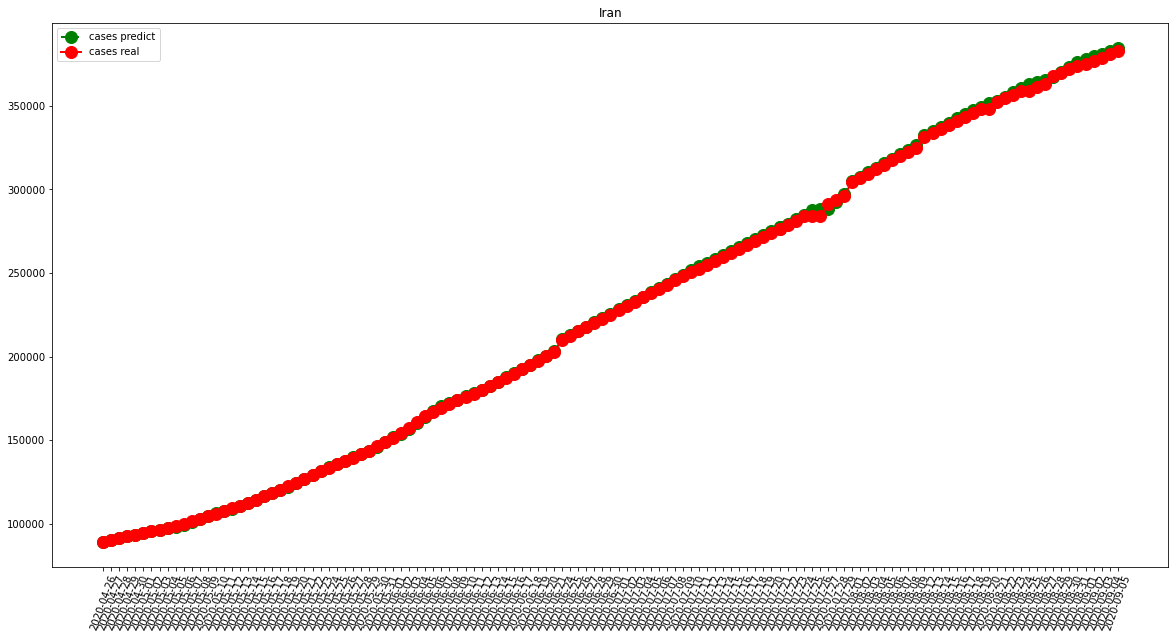

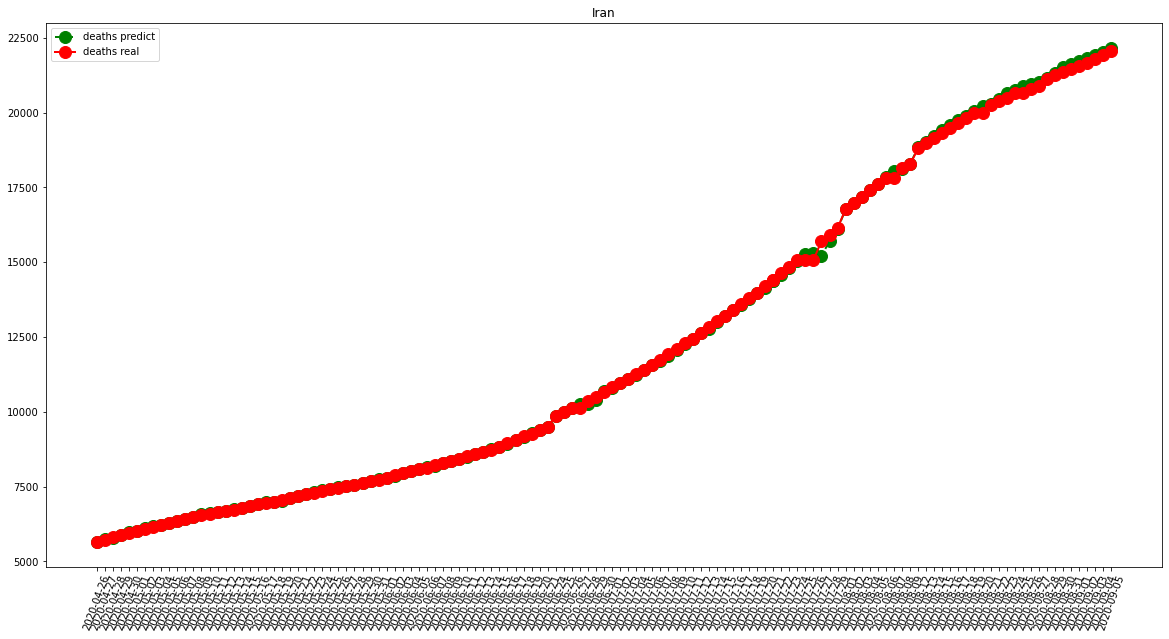

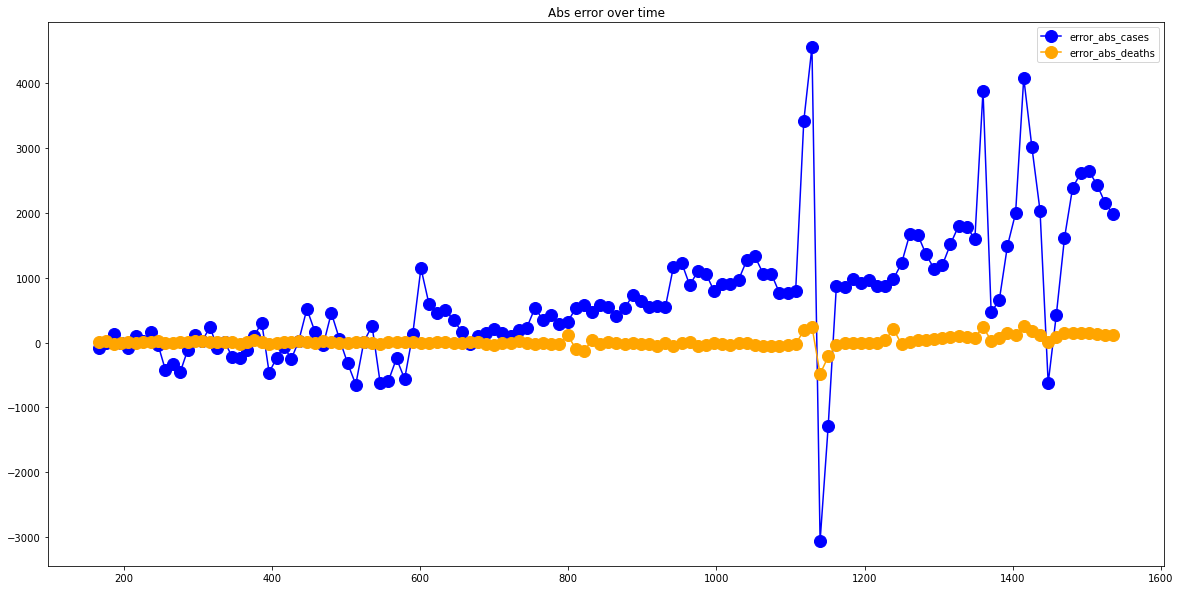

In [15]:
visShow("Iran")

-- Turkey performances for cases --
MAE =  206.0234375
RMSE =  326.1955773573578
-- Turkey performances for deaths --
MAE =  16.21875
RMSE =  89.81056452333434


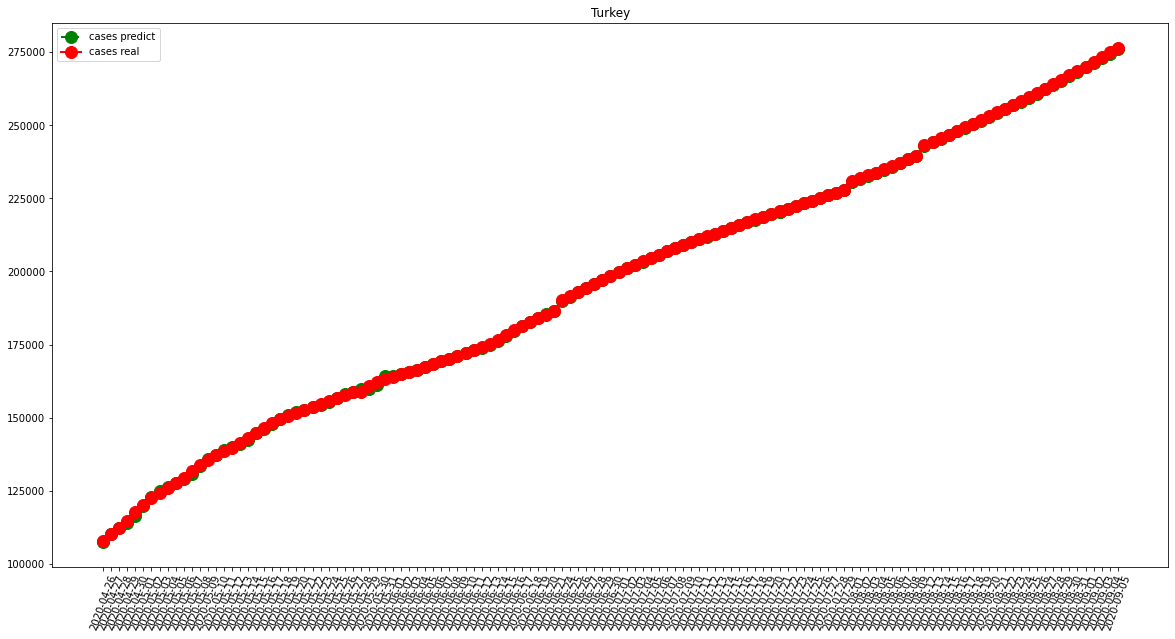

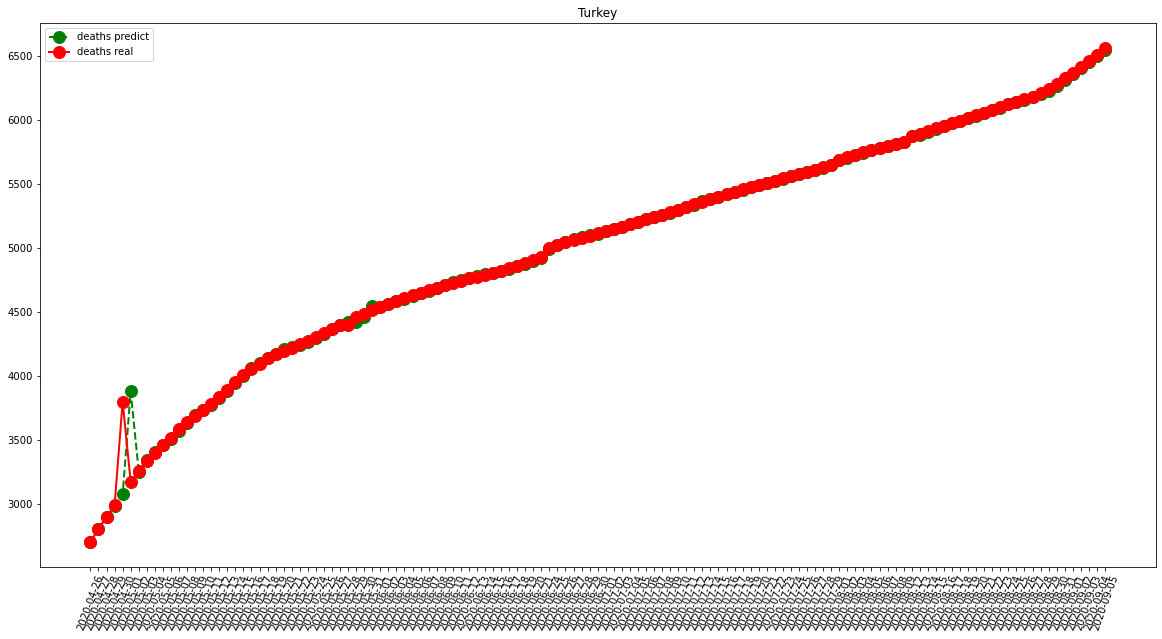

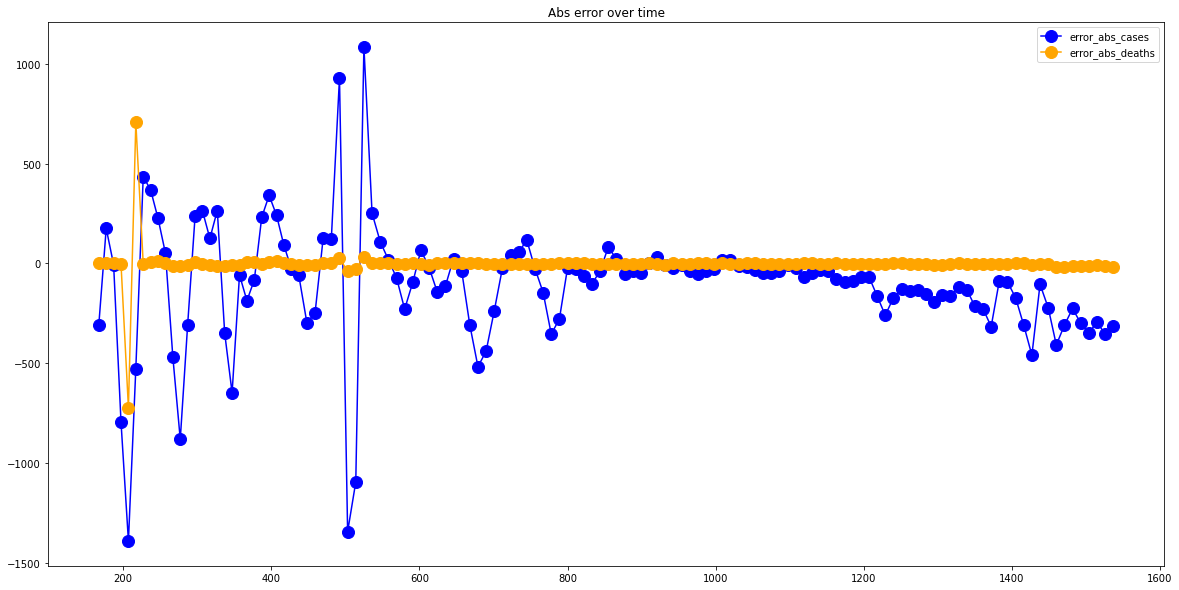

In [16]:
visShow("Turkey")

-- Brazil performances for cases --
MAE =  13940.742574257425
RMSE =  18389.47627996744
-- Brazil performances for deaths --
MAE =  439.990099009901
RMSE =  538.5628749710007


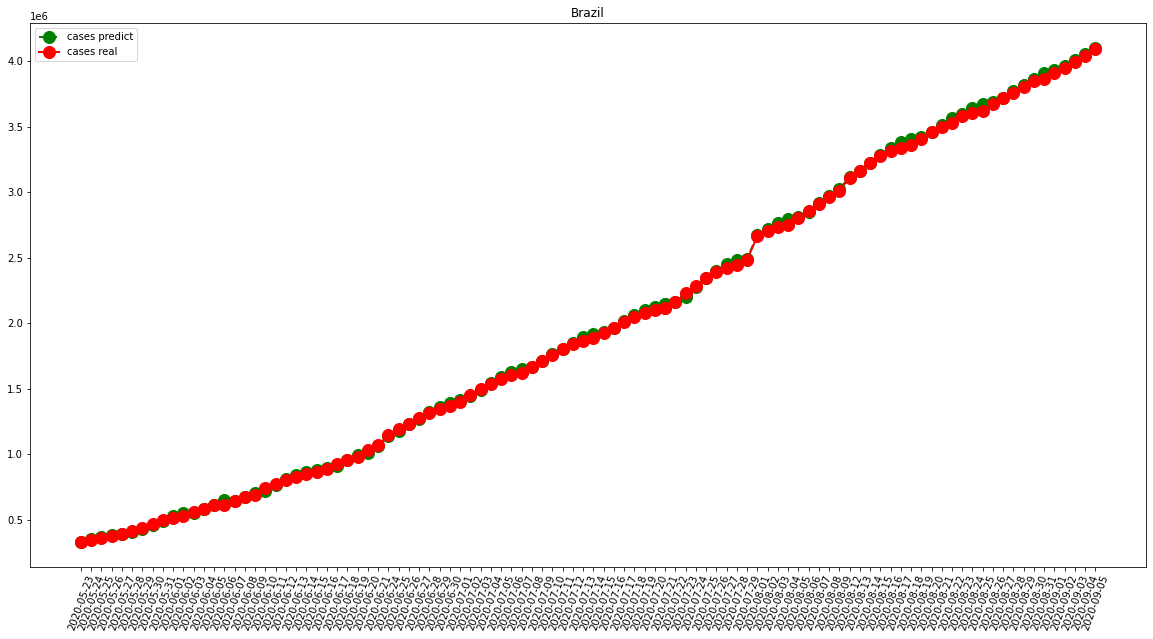

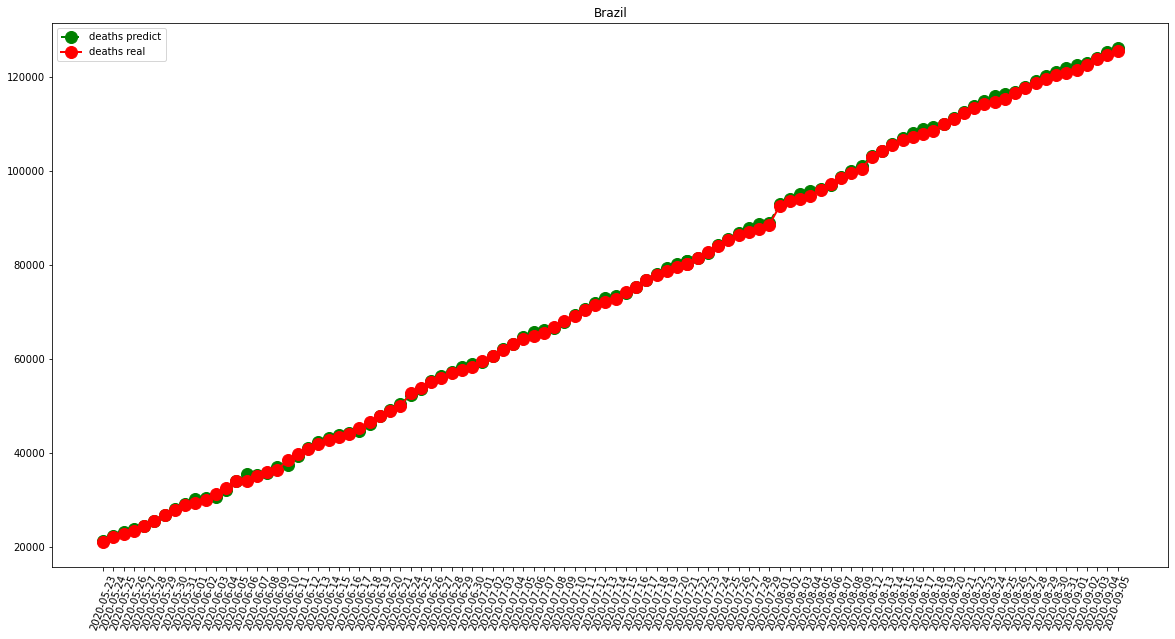

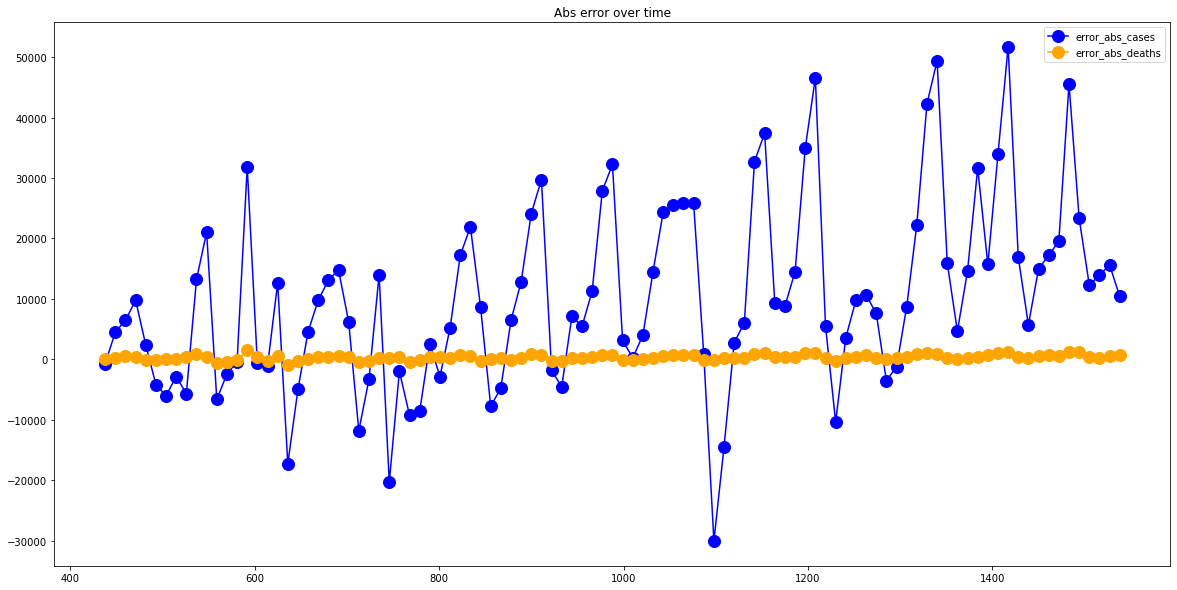

In [17]:
visShow("Brazil")

In [18]:
frame.to_csv(f"AzureSC\\Rapport\\Fullrap{date.today()}.csv")

The data's are sometimes corrected by the authorities, which causes deregulation of the curves and models (example China the 17-04, or France 05/06-04)